<a href="https://www.kaggle.com/code/guyarieli17/ml-ex-4?scriptVersionId=99233858" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Assignment N.2  SMILES

In [1]:
import pandas as pd
from sklearn import preprocessing, ensemble, model_selection, metrics
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.figure(figsize=(20, 10), dpi=80)

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

In [3]:
train_df = pd.read_csv("../input/bgu-chanllnger/X_y_train.csv")
test_x_df = pd.read_csv("../input/bgu-chanllnger/X_test.csv")
train_df.drop_duplicates(inplace=True)
train_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1224,X1225,X1226,X1227,X1228,X1229,X1230,X1231,X1232,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
df_grouped_by = train_df.groupby(['y'])

df_balanced = df_grouped_by.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))

df_balanced = df_balanced.droplevel(['y'])
df_balanced
print(df_balanced.head())

    X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X1224  X1225  X1226  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...    1.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    1.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   X1227  X1228  X1229  X1230  X1231  X1232  y  
0    0.0    0.0    0.0    0.0    1.0    0.0  0  
1    0.0    0.0    0.0    0.0    0.0    0.0  0  
2    0.0    1.0    0.0    0.0    0.0    0.0  0  
3    0.0    0.0    0.0    0.0    0.0    0.0  0  
4    0.0    0.0    0.0    0.0    0.0    0.0  0  

[5 rows x 1233 columns]


<AxesSubplot:>

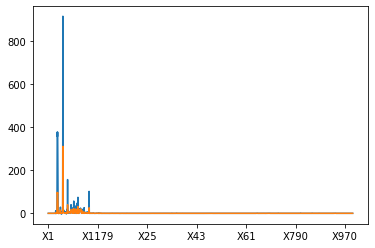

In [5]:
X, y = df_balanced[df_balanced.columns.difference(['y'])], df_balanced['y']
X.mean().plot()
trans_X = preprocessing.QuantileTransformer().fit_transform(X)
X.std().plot()

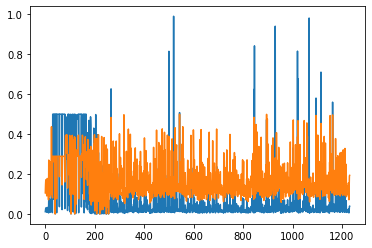

In [6]:
plt.plot(np.mean(trans_X,axis=0))
plt.plot(np.std(trans_X,axis=0))

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(trans_X, y, test_size=0.33, random_state=42)

In [8]:
# model = ensemble.BaggingClassifier(
#     ensemble.ExtraTreesClassifier(max_depth=10,min_samples_split=100),
#     n_estimators=100,
#     max_features=.2,
# )
model = ensemble.ExtraTreesClassifier(n_estimators=800,max_depth=80,min_samples_split=5)

In [9]:
model.fit(X_train,y_train)
print("Training ACC:", model.score(X_train,y_train))
print("Test ACC:", model.score(X_test,y_test))

Training ACC: 0.9908832583471466
Test ACC: 0.5771634615384615


In [10]:
def plot_roc_curve(y_test, y_pred):
    n_classes = len(np.unique(y_test))
    y_test = preprocessing.label_binarize(y_test, classes=np.arange(n_classes))
    y_pred = preprocessing.label_binarize(y_pred, classes=np.arange(n_classes))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    #plt.figure(figsize=(10,5))
    plt.figure(dpi=600)
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink", linestyle=":", linewidth=4,)

    plt.plot(fpr["macro"], tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy", linestyle=":", linewidth=4,)

    colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),)

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()

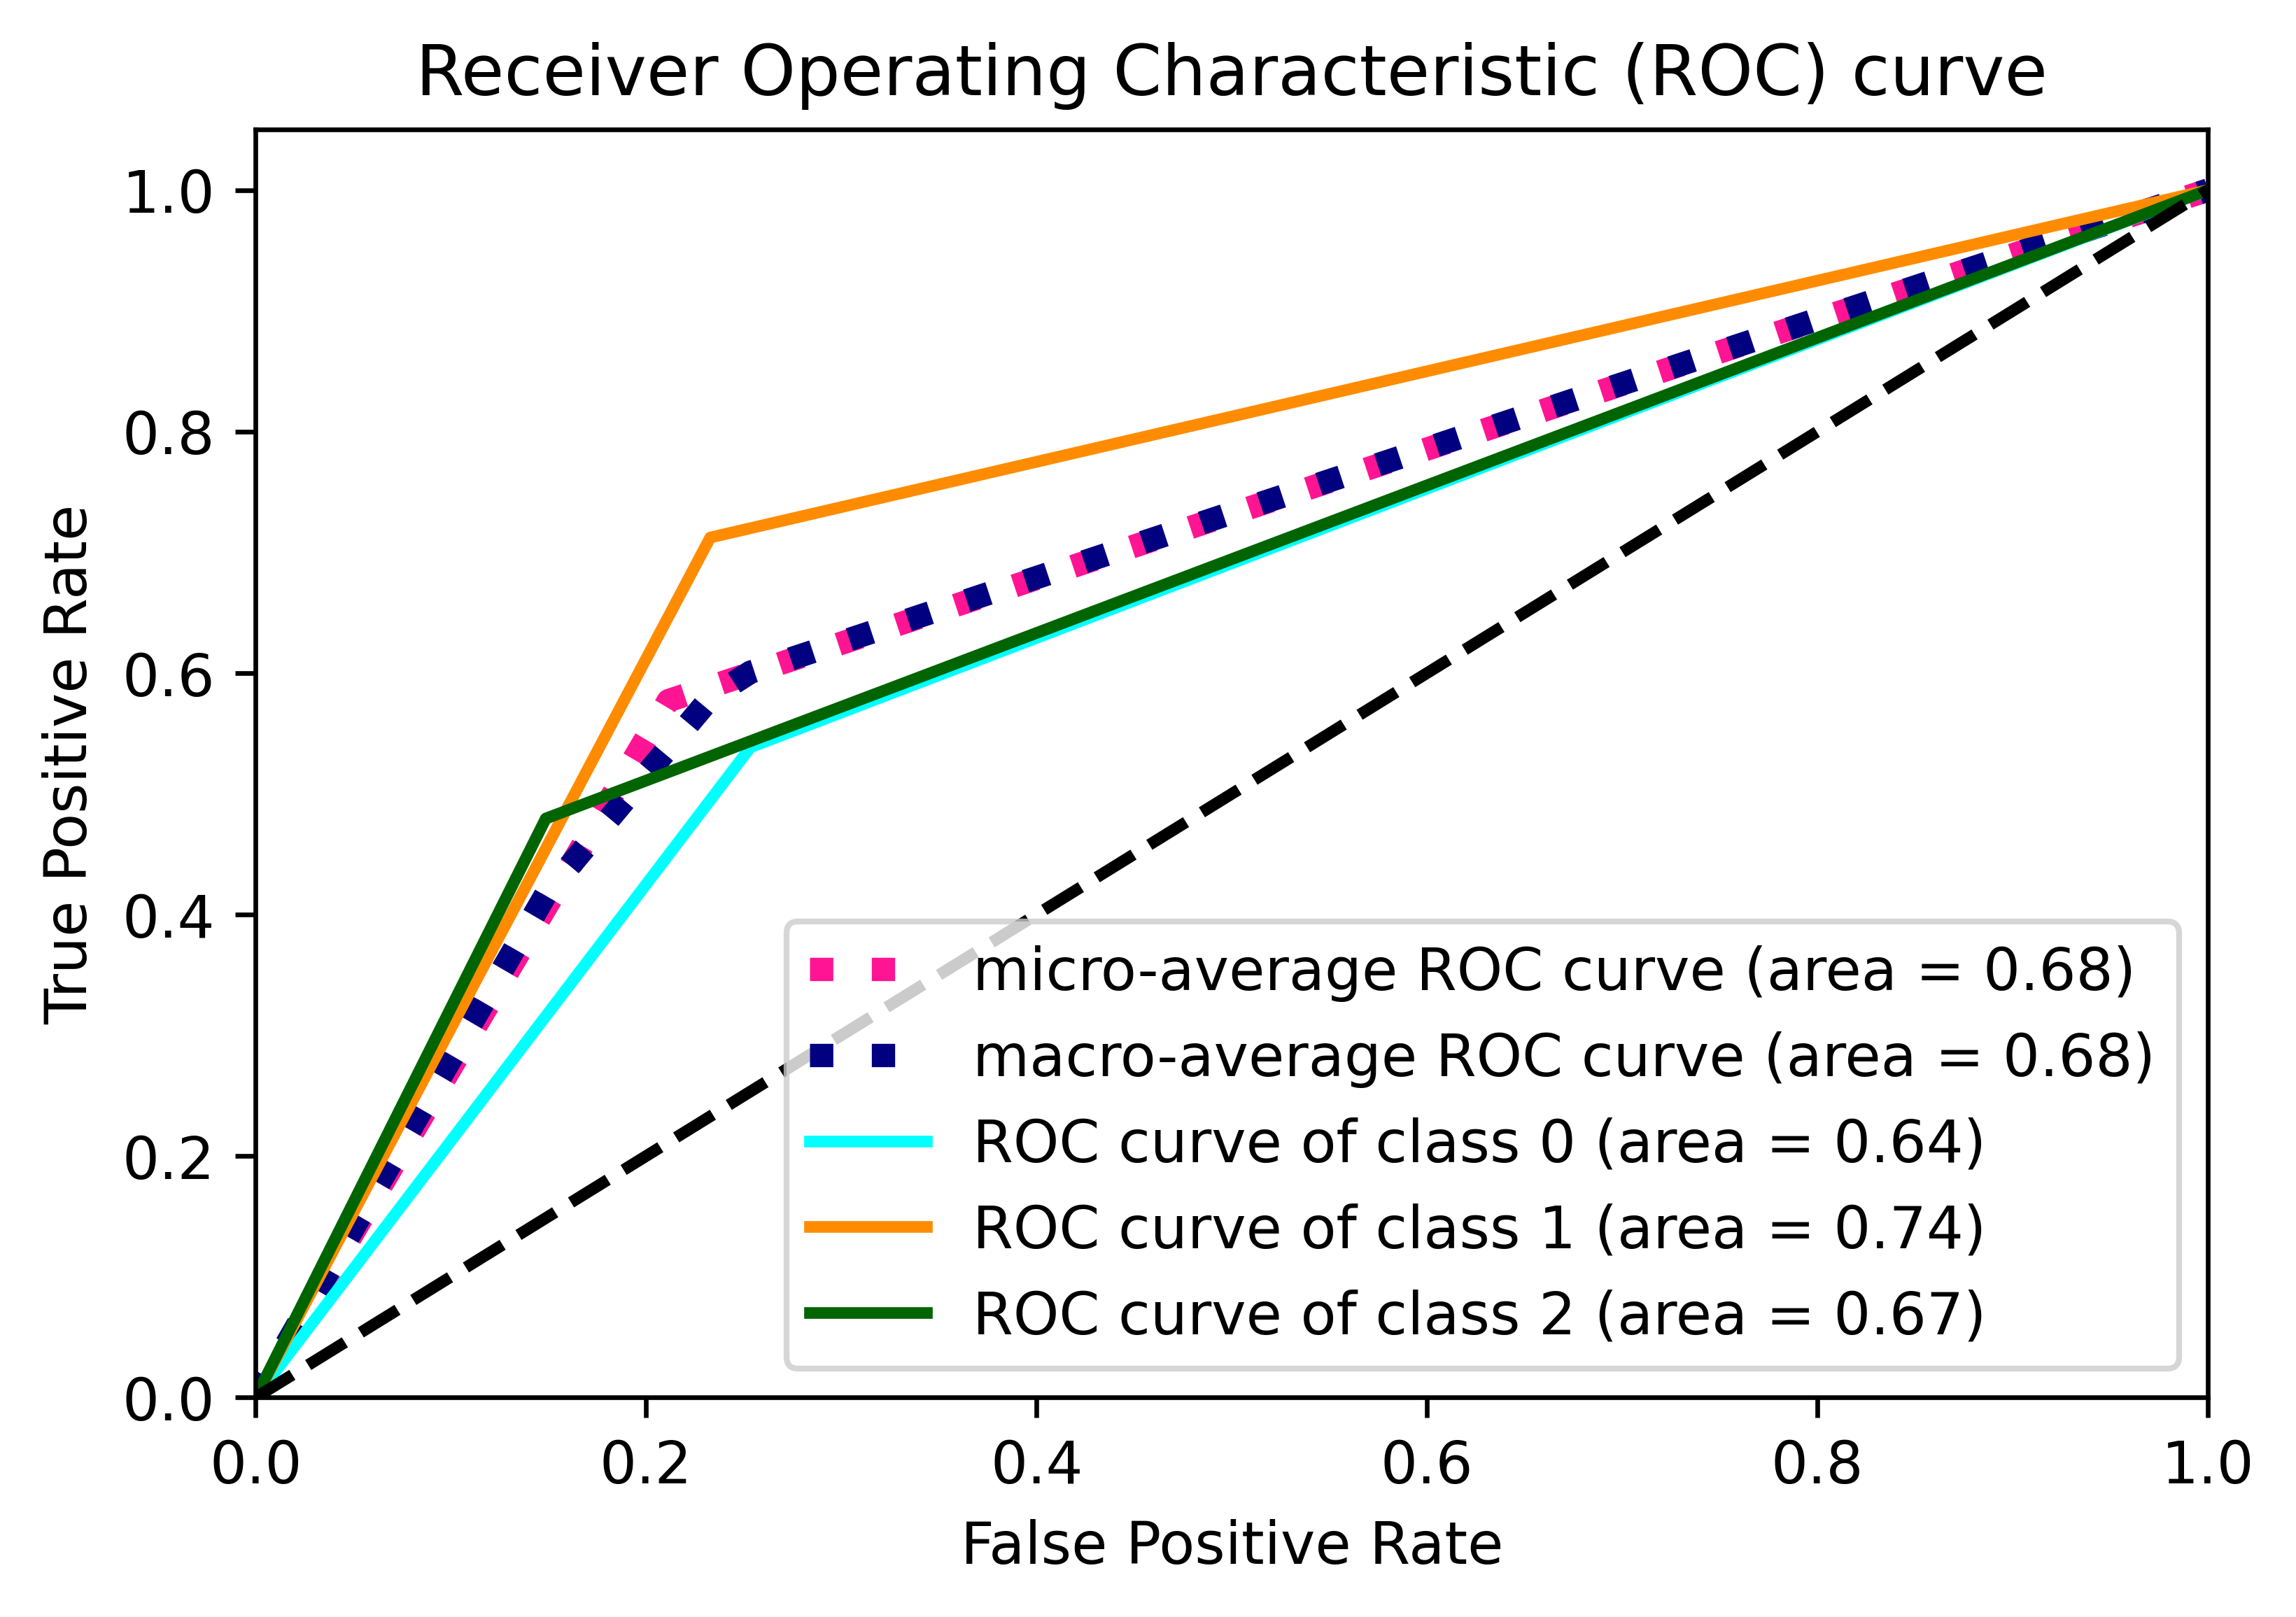

In [11]:
plot_roc_curve(y_test, model.predict(X_test))

In [12]:
model.fit(trans_X,y)

ExtraTreesClassifier(max_depth=80, min_samples_split=5, n_estimators=800)

In [13]:
X, ID = test_x_df[test_x_df.columns.difference(['ID'])], test_x_df['ID']
X = preprocessing.QuantileTransformer().fit_transform(X)
df = pd.DataFrame.from_dict({
    'ID': ID.values.ravel(),
    'y_pred': model.predict(X)
})

In [14]:
df.to_csv('res2.csv',index=False)